In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd

In [3]:
data = pd.read_excel("/kaggle/input/project/Goals  Assist_selected (1).xlsx")

In [5]:
data = data.drop(columns=["Goals", "Assists"])

In [6]:
data.head()

,Unnamed: 0,Age,Matches Played,Starts,Minutes,90s Played,Goals Per 90,Assists Per 90,Non-Penalty Goals Per 90,xG Per 90,xAG Per 90,npxG Per 90
0,AT,32,38,38,3371,37.5,0.77,0.48,0.53,0.67,0.38,0.49
1,DF,33,37,37,3330,37.0,0.08,0.03,0.08,0.06,0.02,0.06
2,MT,22,37,37,3160,35.1,0.00,0.11,0.00,0.03,0.09,0.03
3,MT,25,35,30,2599,28.9,0.17,0.17,0.17,0.10,0.16,0.10
4,DF,25,31,30,2560,28.4,0.04,0.07,0.04,0.06,0.03,0.06


In [9]:
data = pd.get_dummies(data)


In [10]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset
data = pd.read_excel("/kaggle/input/project/Goals  Assist_selected (1).xlsx")

# Set target
target = "Goals Per 90"

# Encode non-numeric columns
data = pd.get_dummies(data)

# Separate X and y
X = data.drop(columns=[target])
y = data[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(objective='reg:squarederror', random_state=42)
}

# Training + Evaluation
results = []

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae  = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2   = r2_score(y_test, y_pred)

    results.append([model_name, mae, rmse, r2])

# Results table
results_df = pd.DataFrame(results, columns=["Model", "MAE", "RMSE", "R²"])
print(results_df)


               Model       MAE      RMSE        R²
0  Linear Regression  0.003846  0.013226  0.996384
1      Random Forest  0.008877  0.051718  0.944705
2            XGBoost  0.006893  0.044627  0.958830


In [11]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset
data = pd.read_excel("/kaggle/input/project/Goals  Assist_selected (1).xlsx")

# -----------------------------
# Target column
# -----------------------------
target = "Assists Per 90"

# One-hot encode non-numeric columns (AT / DF / MT)
data = pd.get_dummies(data)

# Split features and target
X = data.drop(columns=[target])
y = data[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(objective="reg:squarederror", random_state=42)
}

# Train and Evaluate
results = []

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results.append([model_name, mae, rmse, r2])

# Results Table
results_df = pd.DataFrame(results, columns=["Model", "MAE", "RMSE", "R²"])
print(results_df)


               Model       MAE      RMSE        R²
0  Linear Regression  0.036093  0.074480  0.535184
1      Random Forest  0.007248  0.030607  0.921504
2            XGBoost  0.007135  0.028573  0.931591


In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [13]:
def basic_eda(df):
    print("\n=== BASIC EDA ===")
    print("Shape:", df.shape)
    print("Columns:", df.columns.tolist())
    print("\nHead:\n", df.head())
    print("\nInfo:")
    print(df.info())


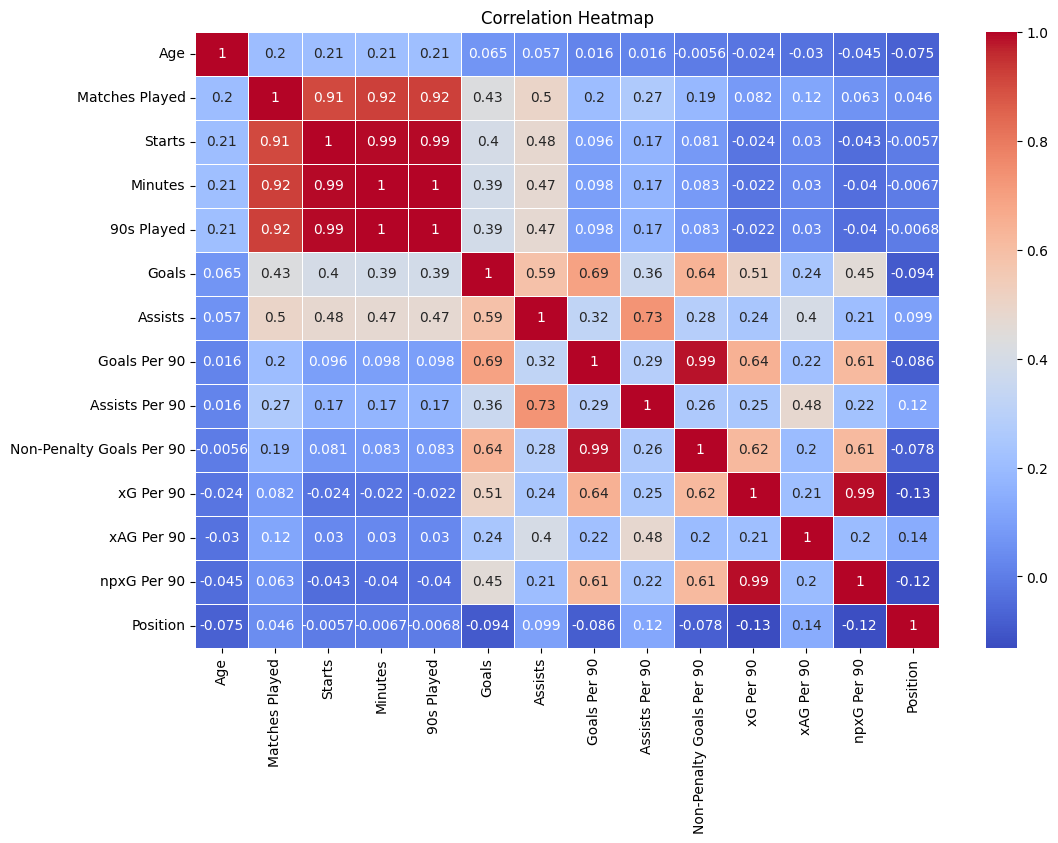

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
data = pd.read_excel("/kaggle/input/project/Goals  Assist_selected (1).xlsx")

# Encode the categorical column "Unnamed: 0"
data['Position'] = data['Unnamed: 0'].astype('category').cat.codes

# Drop the original text column
data = data.drop(columns=["Unnamed: 0"])

# Compute correlation matrix
corr = data.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# Load data
df = pd.read_excel("/kaggle/input/project/Goals  Assist_selected (1).xlsx")

# Encode position
df['Position'] = df['Unnamed: 0'].astype('category').cat.codes
df = df.drop(columns=["Unnamed: 0"])

# Train-test split
X = df.drop("Assists Per 90", axis=1)
y = df["Assists Per 90"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Feature selection on **train only**
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

importances = pd.Series(rf.feature_importances_, index=X_train.columns)
selected_features = importances.sort_values(ascending=False)

print("Feature Importance (Train Only):")
print(selected_features)

# Keep only top K features
K = 5
top_features = selected_features.index[:K]
print("\nTop Features Used:", list(top_features))

# Use these features to train final model
rf_final = RandomForestRegressor(random_state=42)
rf_final.fit(X_train[top_features], y_train)

# Evaluate on TEST data (unseen)
from sklearn.metrics import mean_squared_error, r2_score

y_pred = rf_final.predict(X_test[top_features])

rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("\nRMSE:", rmse)
print("R²:", r2)


Feature Importance (Train Only):
Assists                     0.597197
xAG Per 90                  0.198735
Minutes                     0.083572
90s Played                  0.071526
Starts                      0.016976
Matches Played              0.011813
xG Per 90                   0.004660
Age                         0.003964
npxG Per 90                 0.003274
Non-Penalty Goals Per 90    0.002457
Goals Per 90                0.002282
Position                    0.001791
Goals                       0.001753
dtype: float64

Top Features Used: ['Assists', 'xAG Per 90', 'Minutes', '90s Played', 'Starts']

RMSE: 0.025640849962768136
R²: 0.9449111316233388


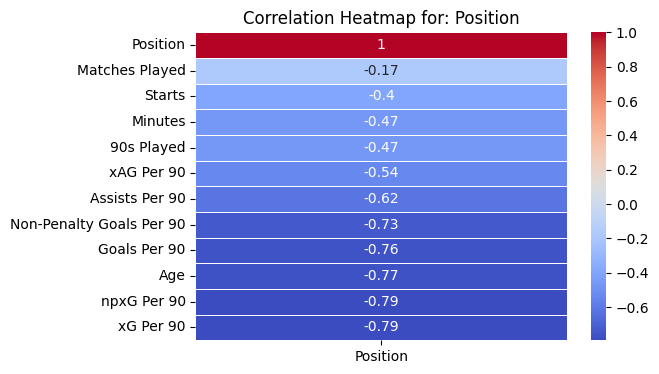

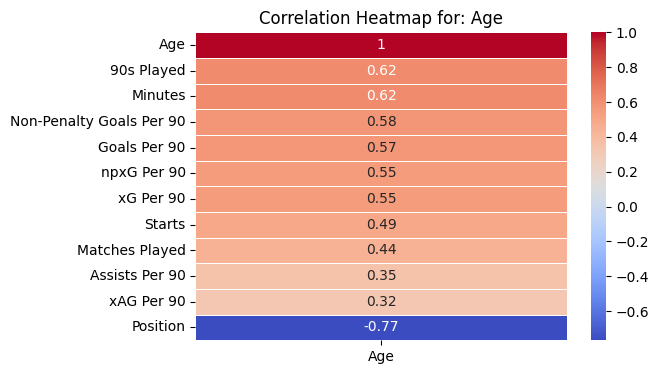

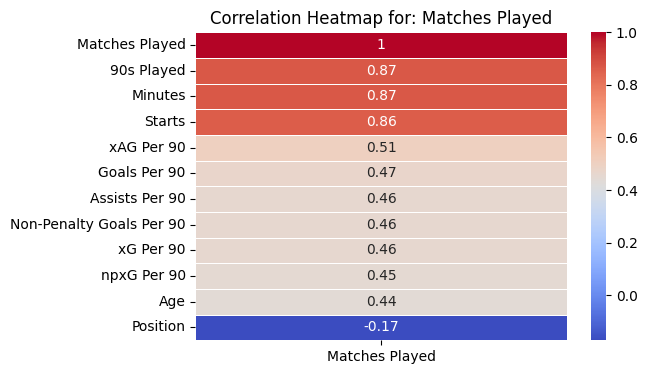

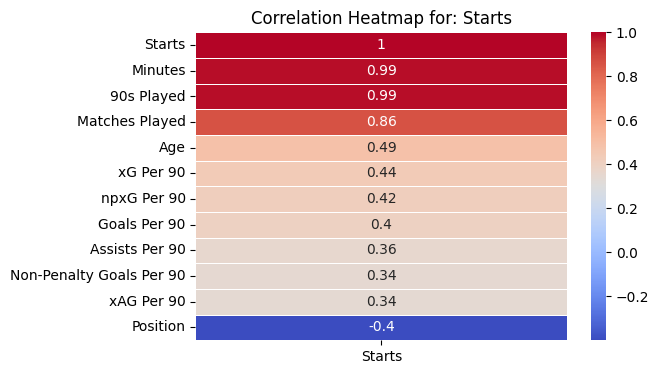

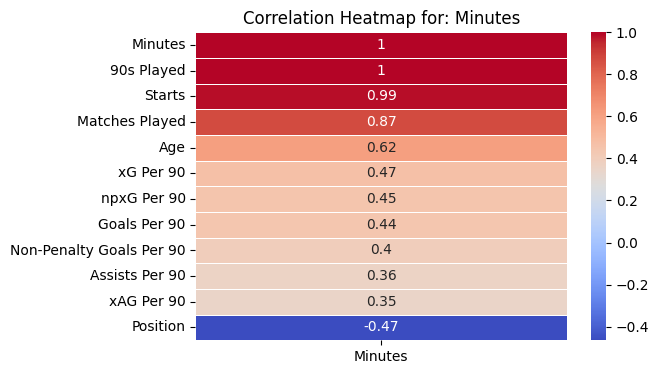

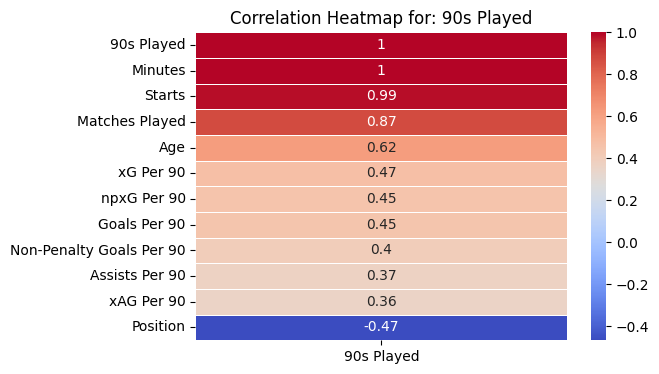

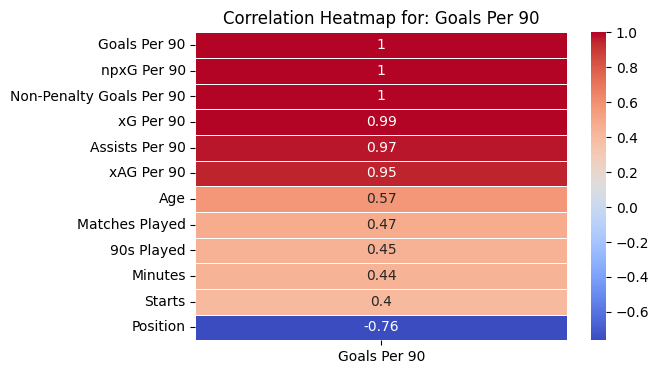

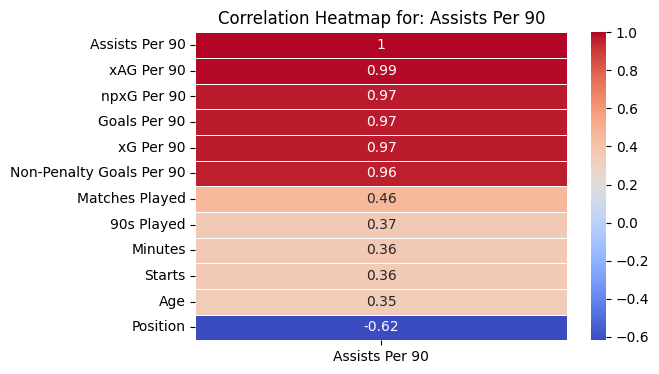

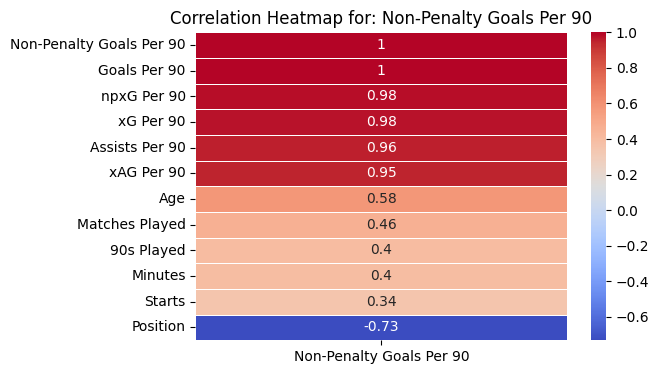

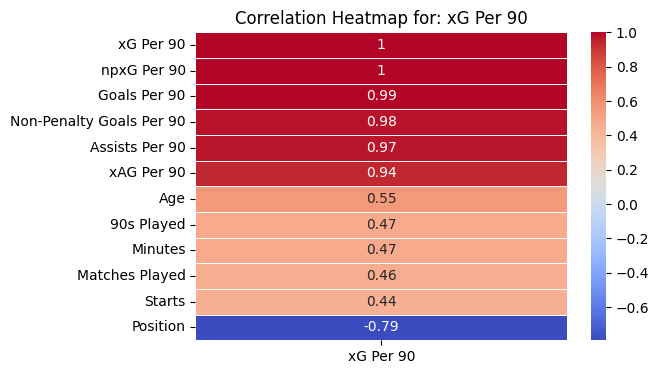

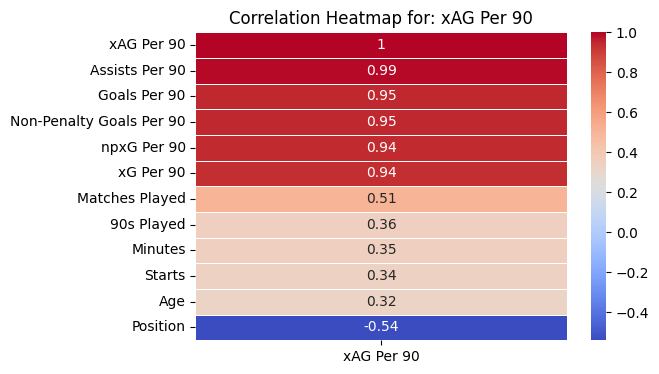

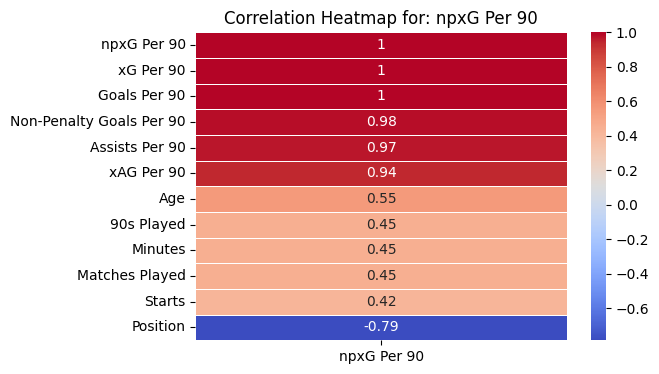

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data
df = pd.DataFrame({
    "Position": ["AT","DF","MT","MT","DF"],
    "Age": [32,33,22,25,25],
    "Matches Played": [38,37,37,35,31],
    "Starts": [38,37,37,30,30],
    "Minutes": [3371,3330,3160,2599,2560],
    "90s Played": [37.5,37.0,35.1,28.9,28.4],
    "Goals Per 90": [0.77,0.08,0.00,0.17,0.04],
    "Assists Per 90": [0.48,0.03,0.11,0.17,0.07],
    "Non-Penalty Goals Per 90": [0.53,0.08,0.00,0.17,0.04],
    "xG Per 90": [0.67,0.06,0.03,0.10,0.06],
    "xAG Per 90": [0.38,0.02,0.09,0.16,0.03],
    "npxG Per 90": [0.49,0.06,0.03,0.10,0.06]
})

# Convert position to numeric
df["Position"] = df["Position"].astype("category").cat.codes

# Compute correlation
corr = df.corr()

# Heatmap for **each column individually**
for col in corr.columns:
    plt.figure(figsize=(6, 4))
    sns.heatmap(corr[[col]].sort_values(by=col, ascending=False), 
                annot=True, cmap="coolwarm", linewidths=0.5)
    plt.title(f"Correlation Heatmap for: {col}")
    plt.show()
